In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('new-site.csv', sep='\t')
df

,site,dwell-time
0,0,2
1,1,48
2,0,15
3,1,16
4,0,38
...,...,...
295,0,22
296,0,7
297,1,144
298,0,89


In [17]:
df[df['site']==0]['dwell-time'].sum()

16898

In [18]:
df[df['site']==1]['dwell-time'].sum()

10032

In [20]:
round(df[df['site']==0]['dwell-time'].mean())

91

In [21]:
round(df[df['site']==1]['dwell-time'].mean())

88

In [25]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# A
data_A = list(df[df['site']==0]['dwell-time'])

_, p = stats.shapiro(data_A)

print('p-value = %.3f' % (p))

if p <= alpha:
    print('Распределение в A не нормальное')
else:
    print('Распределение в A нормальное')

# B
data_B = list(df[df['site']==1]['dwell-time'])

_, p = stats.shapiro(data_B)

print('p-value = %.3f' % (p))

if p <= alpha:
    print('Распределение в B не нормальное')
else:
    print('Распределение в B нормальное')

p-value = 0.000
Распределение в A не нормальное
p-value = 0.000
Распределение в B не нормальное


In [26]:
import seaborn as sns

<Axes: ylabel='Count'>

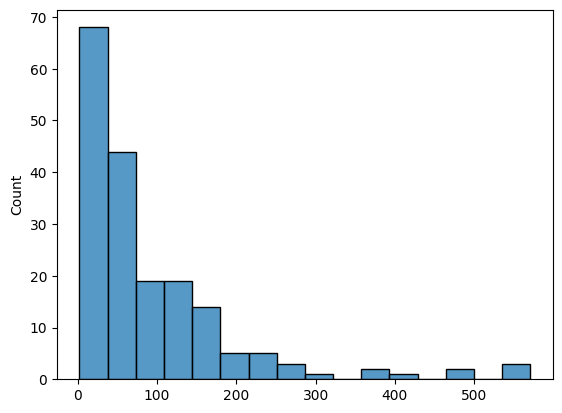

In [30]:
sns.histplot(data_A)

<Axes: ylabel='Count'>

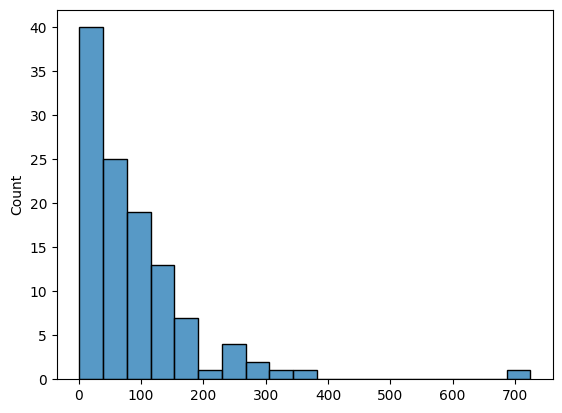

In [29]:
sns.histplot(data_B)

In [31]:
alpha = 0.05 

_, p = stats.mannwhitneyu(data_A, data_B)

print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.896
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
